Enter the number of edges:  7
Enter edge (u v weight):  1 2 4
Enter edge (u v weight):  1 3 2
Enter edge (u v weight):  2 3 5
Enter edge (u v weight):  2 4 10
Enter edge (u v weight):  3 4 3
Enter edge (u v weight):  3 5 6
Enter edge (u v weight):  4 5 8


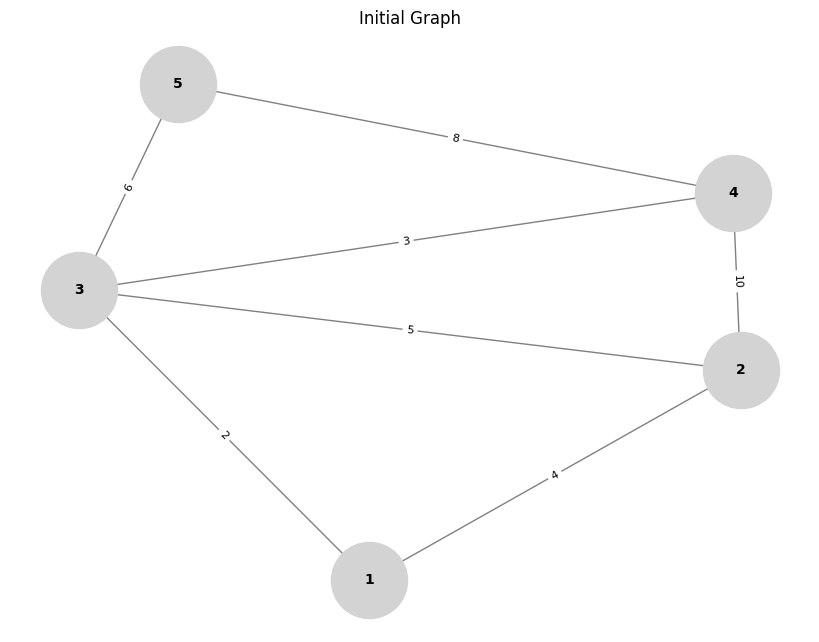

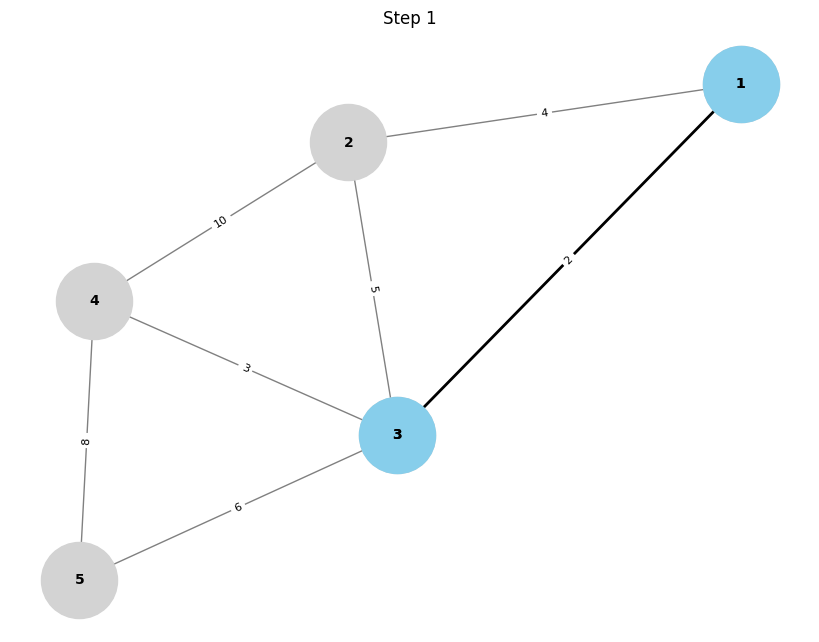

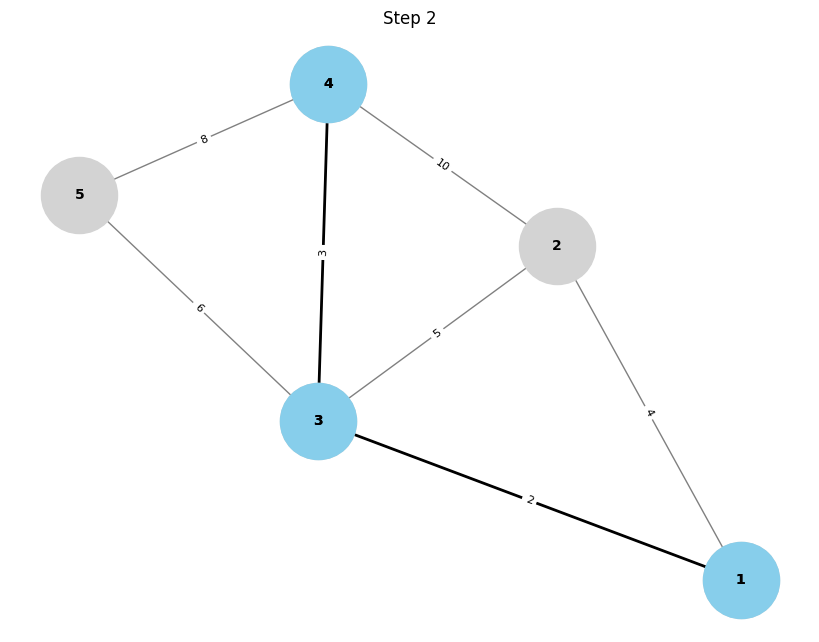

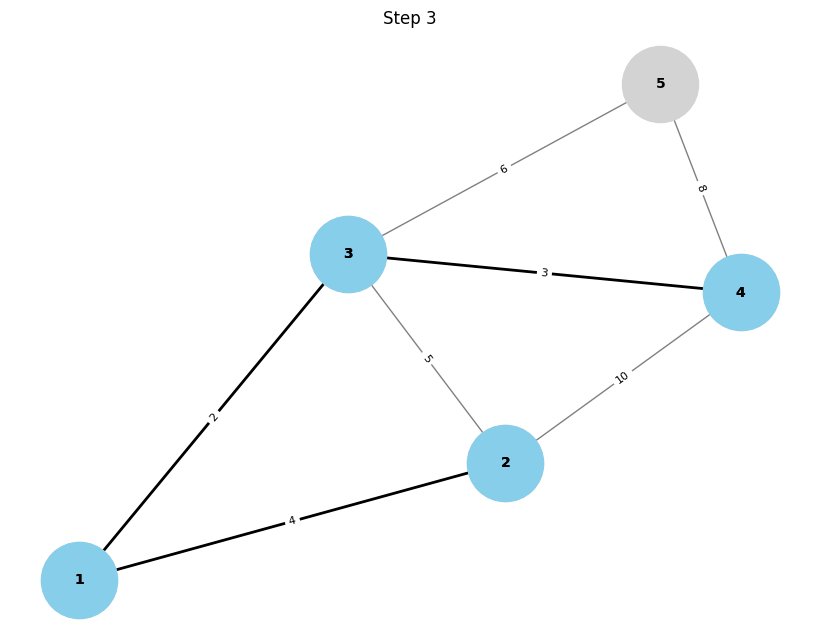

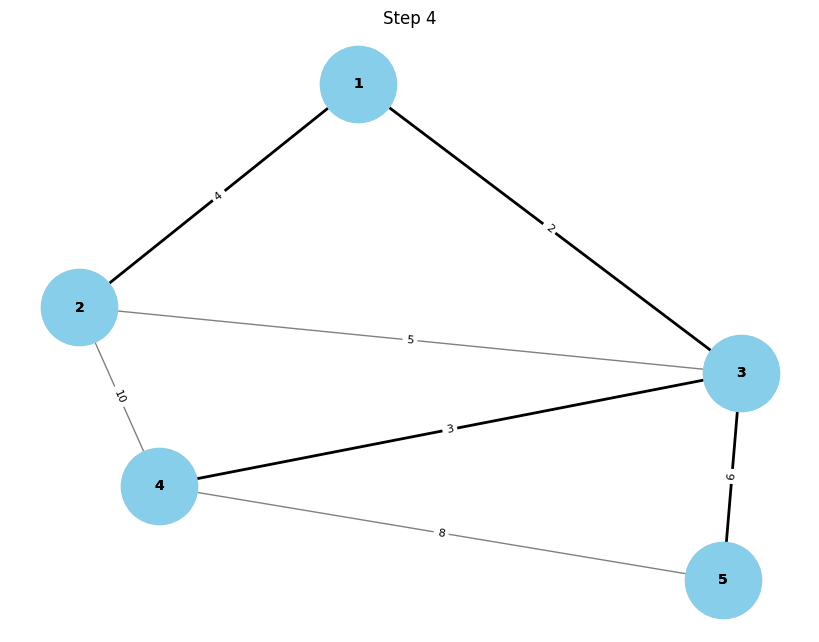

Minimum Spanning Tree edges: [(1, 3, 2), (3, 4, 3), (1, 2, 4), (3, 5, 6)]


In [1]:
import time
import networkx as nx
import matplotlib.pyplot as plt

def kruskal_mst(graph):
    """
    Kruskal's Algorithm to find the Minimum Spanning Tree (MST) of a graph.
    It returns the edges in the MST and visualizes the process step by step.
    """
    parent = {}
    rank = {}

    def find(u):
        if parent[u] != u:
            parent[u] = find(parent[u])  # Path compression
        return parent[u]

    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        if root_u != root_v:
            if rank[root_u] > rank[root_v]:
                parent[root_v] = root_u
            elif rank[root_u] < rank[root_v]:
                parent[root_u] = root_v
            else:
                parent[root_v] = root_u
                rank[root_u] += 1

    for node in graph.nodes():
        parent[node] = node
        rank[node] = 0

    edges = list(graph.edges(data=True))
    edges.sort(key=lambda x: x[2]['weight'])  # Sort by edge weight

    mst_edges = []

    # Show the initial graph before starting Kruskal’s Algorithm
    visualize_graph(graph, mst_edges, "Initial Graph")

    for u, v, data in edges:
        if find(u) != find(v):
            mst_edges.append((u, v, data['weight']))  # Save edge with weight
            union(u, v)
            # Visualize the current MST after each step
            visualize_graph(graph, mst_edges, f"Step {len(mst_edges)}")
            time.sleep(1)  # Pause to show the step

    return mst_edges

def visualize_graph(graph, mst_edges, title="Graph Visualization"):
    """
    Visualize the original graph and MST step by step.
    """
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)  # Fixed layout for consistency

    # Draw original graph with all edges
    nx.draw(graph, pos, with_labels=True, node_color='lightgray',
            node_size=3000, font_size=10, font_weight='bold',
            edge_color='gray', width=1)

    # Highlight MST edges
    mst_graph = nx.Graph()
    mst_graph.add_edges_from([(u, v, {'weight': w}) for u, v, w in mst_edges])
    nx.draw(mst_graph, pos, with_labels=True, node_color='skyblue',
            node_size=3000, font_size=10, font_weight='bold',
            edge_color='black', width=2)

    # Display edge weights
    edge_labels = {(u, v): data['weight'] for u, v, data in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels,
                                 font_size=8)

    plt.title(title)
    plt.show()

def get_user_input():
    """
    Get the graph input from the user.
    """
    graph = nx.Graph()
    num_edges = int(input("Enter the number of edges: "))
    for _ in range(num_edges):
        u, v, weight = input("Enter edge (u v weight): ").split()
        u, v, weight = int(u), int(v), int(weight)
        graph.add_edge(u, v, weight=weight)
    return graph

# Get the graph from user input
graph = get_user_input()

# Run Kruskal's Algorithm to find MST and visualize
mst = kruskal_mst(graph)
print("Minimum Spanning Tree edges:", mst)
